In [117]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_breast_cancer

In [120]:
data = load_breast_cancer()
X = data.data
y = data.target

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

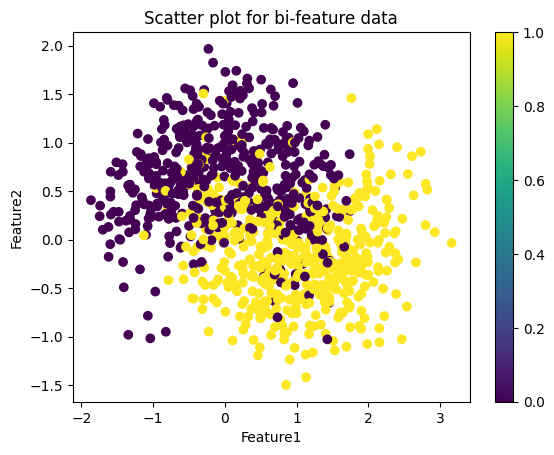

In [81]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot for bi-feature data')
plt.colorbar()
plt.show()

In [139]:
model1 = SVC(probability = True)
model2 = DecisionTreeClassifier()
model3 = GaussianNB()

In [140]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

GaussianNB()

In [123]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.savefig('plot1.png')
plt.show()

ValueError: X has 2 features, but SVC is expecting 30 features as input.

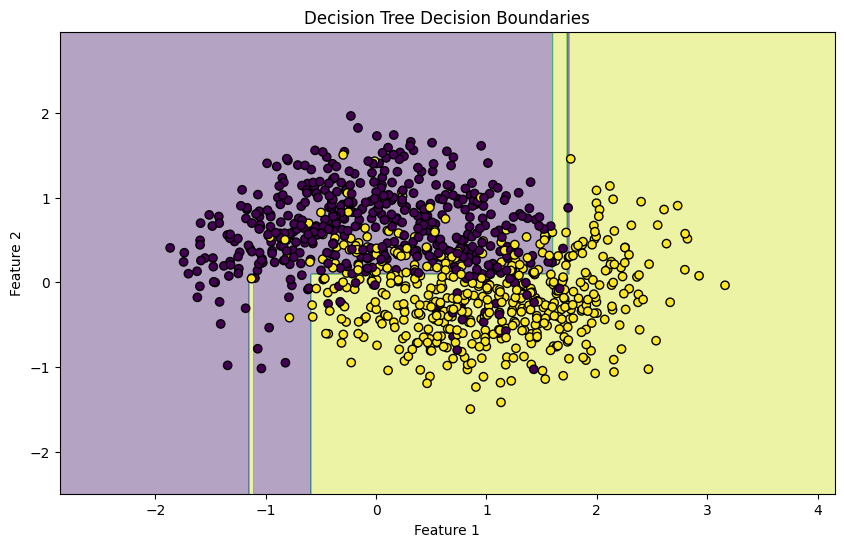

In [97]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries')
plt.savefig('plot1.png')
plt.show()

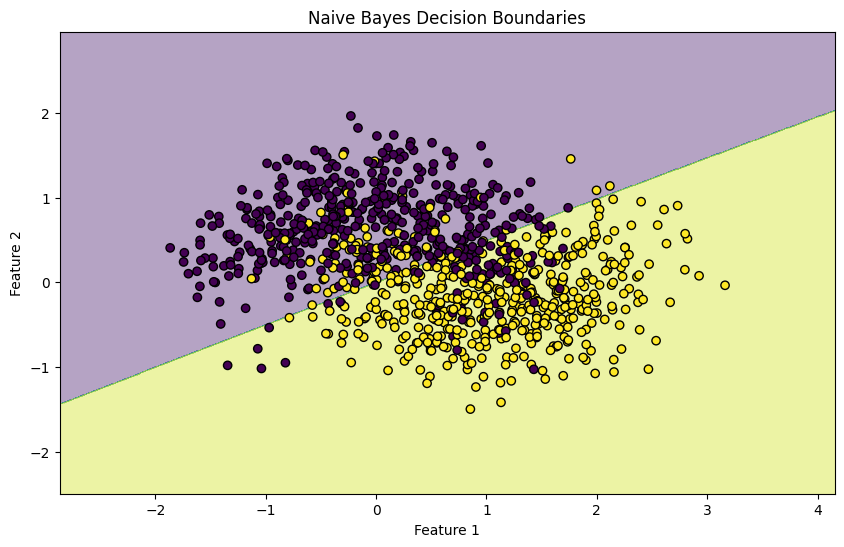

In [106]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.savefig('plot1.png')
plt.show()

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
print(accuracy_score(y_train, model1.predict(X_train)), accuracy_score(y_train, model2.predict(X_train)), accuracy_score(y_train, model3.predict(X_train)))
print(accuracy_score(y_test, model1.predict(X_test)), accuracy_score(y_test, model2.predict(X_test)), accuracy_score(y_test, model3.predict(X_test)))

0.907035175879397 1.0 0.9472361809045227
0.9298245614035088 0.9415204678362573 0.9473684210526315


In [130]:
from sklearn.ensemble import VotingClassifier

In [131]:
ensemble1 = VotingClassifier(estimators=
                            [('SVM1', model1), 
                             ('DT1', model2), 
                             ('NB1', model3)], 
                            voting='hard')  # Choose 'hard' or 'soft' voting
ensemble2 = VotingClassifier(estimators=
                            [('SVM2', model1), 
                             ('DT2', model2), 
                             ('NB3', model3)], 
                            voting='soft')  # Choose 'hard' or 'soft' voting

In [133]:
ensemble1.fit(X_train, y_train)
ensemble2.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM2', SVC(probability=True)),
                             ('DT2', DecisionTreeClassifier(max_depth=4)),
                             ('NB3', GaussianNB())],
                 voting='soft')

In [137]:
print(accuracy_score(y_train, ensemble1.predict(X_train)))
print(accuracy_score(y_test, ensemble1.predict(X_test)))

0.964824120603015
0.9590643274853801


In [138]:
print(accuracy_score(y_train, ensemble2.predict(X_train)))
print(accuracy_score(y_test, ensemble2.predict(X_test)))

0.964824120603015
0.9590643274853801
